<a href="https://colab.research.google.com/github/tsfkingsport/Thinkful-Unsupervised-Learning/blob/July-1/Lyrics_Project_First_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/Data_Science')

In [0]:
df = pd.read_csv("lyrics.csv")

In [0]:
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [0]:
df.info()
#There are a lot of songs without lyrics so I'll remove them. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [0]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266556 entries, 0 to 362236
Data columns (total 6 columns):
index     266556 non-null int64
song      266556 non-null object
year      266556 non-null int64
artist    266556 non-null object
genre     266556 non-null object
lyrics    266556 non-null object
dtypes: int64(2), object(4)
memory usage: 14.2+ MB


In [0]:
df.iloc[2,5]
#Sanity check to ensure the lyrics are there. 

"If you search\nFor tenderness\nIt isn't hard to find\nYou can have the love\nYou need to live\nBut if you look\nFor truthfulness\nYou might just\nAs well be blind\nIt always seems to be\nSo hard to give\nChorus:\nHonesty\nIs such a lonely word\nEveryone is so untrue\nHonesty\nIs hardly ever heard\nAnd mostly\nWhat I need from you\nI can always\nFind someone\nTo say\nThey sympathize\nIf I wear my heart\nOut on my sleeve\nBut I don't want\nSome pretty face\nTo tell me\nPretty lies\nAll I want\nIs someone\nTo believe\n(Chorus)\nI can find a lover\nI can find a friend\nI can have security\nUntil the bitter end\nAnyone can comfort me\nWith promises again\nI know, I know\nWhen I'm deep\nInside of me\nDon't be\nToo concerned\nI won't ask\nFor nothin'\nWhile I'm gone\nBut when I want\nSincerity\nTell me where else\nCan I turn\nWhen\nYou're the one\nThat I depend upon\n(Chorus)"

In [0]:
#removing the \n from the text
df.replace(to_replace = '\n', value = ' ', regex = True, inplace = True)
df.iloc[2,5]

"If you search For tenderness It isn't hard to find You can have the love You need to live But if you look For truthfulness You might just As well be blind It always seems to be So hard to give Chorus: Honesty Is such a lonely word Everyone is so untrue Honesty Is hardly ever heard And mostly What I need from you I can always Find someone To say They sympathize If I wear my heart Out on my sleeve But I don't want Some pretty face To tell me Pretty lies All I want Is someone To believe (Chorus) I can find a lover I can find a friend I can have security Until the bitter end Anyone can comfort me With promises again I know, I know When I'm deep Inside of me Don't be Too concerned I won't ask For nothin' While I'm gone But when I want Sincerity Tell me where else Can I turn When You're the one That I depend upon (Chorus)"

In [0]:
#Creating a column for word count. There are songs in this dataset that only have 1 word or the word is just [Instrumental]
#Which shows that the song is just instrumentals.  Those songs are outside the focus of this project

df['word_count'] = df['lyrics'].str.split().str.len()
df.head()

,index,song,year,artist,genre,lyrics,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


In [0]:
print(sum(df['word_count'] == 1))#Need to remove the songs with 1 word
print(sum(df['word_count'] == 0)) #so no songs with zero lyrics, 

3842
0


In [0]:
df = df[df['word_count'] !=1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262714 entries, 0 to 362236
Data columns (total 7 columns):
index         262714 non-null int64
song          262714 non-null object
year          262714 non-null int64
artist        262714 non-null object
genre         262714 non-null object
lyrics        262714 non-null object
word_count    262714 non-null int64
dtypes: int64(3), object(4)
memory usage: 16.0+ MB


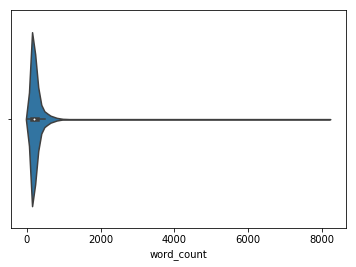

In [0]:
sns.violinplot(x = df['word_count'])

WOW, I did not expect some of those outliers in the data in regards to word count.  Time to do some other methods of data exploration to investigate further. 

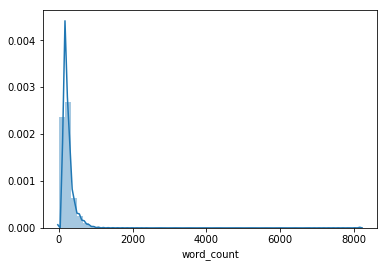

In [0]:
sns.distplot(df['word_count'])

In [0]:
print(sum(df['word_count'] > 500))
print("Percentage of songs above 500 words " + 
      str((sum(df['word_count'] > 500) / sum(df['word_count'])) * 100) + '%')
print("Percentage of songs above 150 words " + 
      str((sum(df['word_count'] > 150) / sum(df['word_count'])) * 100) + '%')
print(sum(df['word_count'] > 150))

16667
Percentage of songs above 500 words 0.027530265907483007%
Percentage of songs above 150 words 0.29250762995695306%
177086


In [0]:
df = df[df['word_count'] < 500]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245963 entries, 0 to 362236
Data columns (total 7 columns):
index         245963 non-null int64
song          245963 non-null object
year          245963 non-null int64
artist        245963 non-null object
genre         245963 non-null object
lyrics        245963 non-null object
word_count    245963 non-null int64
dtypes: int64(3), object(4)
memory usage: 15.0+ MB


Something went really wrong in the above code.  I don't know why the song count dropped so much

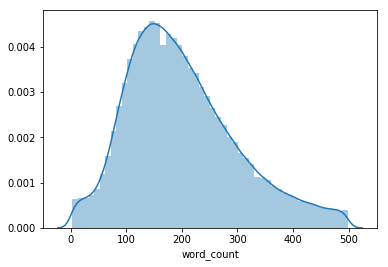

In [0]:
sns.distplot(df['word_count'])

In [0]:
print("Percentage of songs below 50 words " + 
      str((sum(df['word_count'] < 50) / sum(df['word_count'])) * 100) + '%')
print(sum(df['word_count'] < 50))

print("Percentage of songs below 100 words " + 
      str((sum(df['word_count'] < 100) / sum(df['word_count'])) * 100) + '%')
print(sum(df['word_count'] < 100))


Percentage of songs below 50 words 0.01648742604518996%
8145
Percentage of songs below 100 words 0.06764399216109428%
33417


I now realize that I completely screwed up the parenthesis on the sentences of the print statements. Still not entirely sure what the screw up was but its there somewhere 

In [0]:
df = df[df['word_count'] > 50]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237586 entries, 0 to 362236
Data columns (total 7 columns):
index         237586 non-null int64
song          237586 non-null object
year          237586 non-null int64
artist        237586 non-null object
genre         237586 non-null object
lyrics        237586 non-null object
word_count    237586 non-null int64
dtypes: int64(3), object(4)
memory usage: 14.5+ MB


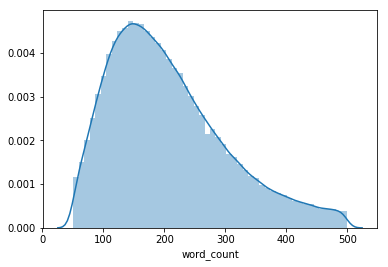

In [0]:
sns.distplot(df['word_count'])

In [0]:
df = df[(df['genre'] == 'Pop') | (df['genre'] == 'Rock')]

In [0]:
from nltk.tokenize import RegexpTokenizer  
from nltk.corpus import stopwords  
from keras.models import Sequential  
from keras.layers import Dense, Dropout, LSTM  
from keras.utils import np_utils  
from keras.callbacks import ModelCheckpoint  

Using TensorFlow backend.


In [0]:
def tokenize_words(input):  
    # lowercase everything to standardize it
    input = input.lower()
    
    # instantiate the tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(input)

    # if the created token isn't in the stop words, make it part of "filtered"
    filtered = filter(lambda token: token not in stopwords.words('english'), tokens)
    return " ".join(filtered)

In [0]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
import pickle

data_path = '/content/gdrive/My Drive/Data_Science/' ''
infile = open(data_path+'tokenized_words.p', 'rb')
tokenized_words = pickle.load(infile)

In [0]:
print(type(tokenized_words))

<class 'pandas.core.series.Series'>


In [0]:
#tokenized_words = df['lyrics'].apply(tokenize_words)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tokenized_words)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(tokenized_words)
tf_feature_names = tf_vectorizer.get_feature_names()

In [0]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 2

# Run NMF
nmf = NMF(n_components=no_topics, 
          random_state=1, 
          alpha=.1, 
          l1_ratio=.5,
          init='nndsvd')
         
nmf.fit(tfidf)
          

 #Run LDA
lda = LatentDirichletAllocation(2, max_iter=5, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print( "Topic %d:" % (topic_idx))
        print( " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 30
display_topics(nmf, tfidf_feature_names, no_top_words)
#display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
know oh time want like got let way say away baby come yeah gonna feel make cause life right day tell need think chorus night world heart wanna long good
Topic 1:
love baby heart need oh true know want forever feel hold let make fall girl sweet say tell believe cause like arms darling ooh chorus loving kiss touch way life


In [0]:
type(tokenized_words)

pandas.core.series.Series

At this point I am attempting to pickle the variable tokenized words due to how long it took for the tokenized words to be created.  I have tried multiple methods and have yet to create a file I can look at, so unless it's created but hidden somewhere I have not yet finished the first part in creating a pickle then loading it later to save time. 


In [0]:
#tokenized_words.to_csv('/tokenized_words.csv', header=None)

In [0]:
print(tokenized_words.shape)

(141222,)


In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
#I don't know how to properly integrate a dictionary into this. 
'''
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda, corpus=tokenized_words)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)
'''


TypeError: ignored

In [0]:
#pickle.dump(tokenized_words, open('tokenized_words.p', 'wb'))

In [0]:
#tokenized_words.write_csv()

In [0]:
#words_series = tokenized_words.write('/Colab Notebooks/tokenized_words.txt')